# Prosit 1

Imporation des packages et création du graphe :

In [79]:
import copy
import time
import networkx as nx
from collections import deque
from typing import Any, Callable

graph = nx.Graph()

Création des sommets et des arêtes :

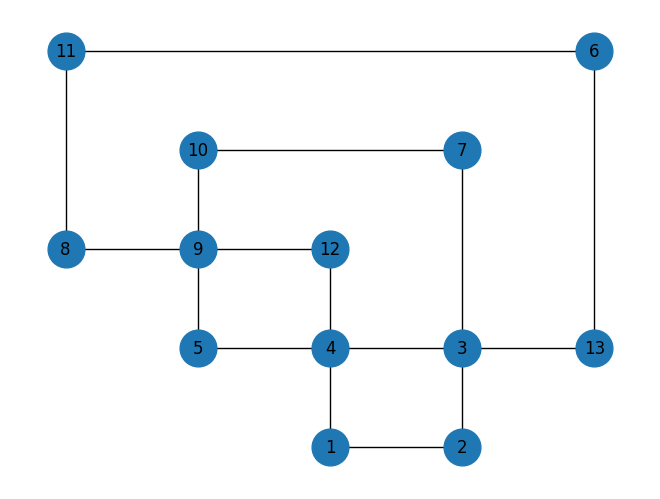

In [80]:
street_list = {
    1: [2, 4],
    2: [1, 3],
    3: [2, 4, 7, 13],
    4: [1, 3, 5, 12],
    5: [4, 9],
    6: [11, 13],
    7: [3, 10],
    8: [11, 9],
    9: [5, 8, 10, 12],
    10: [7, 9],
    11: [6, 8],
    12: [4, 9],
    13: [3, 6]
}

graph.add_nodes_from(street_list.keys())
graph.add_edges_from([(key, value) for key, values in street_list.items() for value in values ])

# Position des sommets fixée pour une meilleure lisibilité
position = {
    1: [2, 0],
    2: [3, 0],
    3: [3, 1],
    4: [2, 1],
    5: [1, 1],
    6: [4, 4],
    7: [3, 3],
    8: [0, 2],
    9: [1, 2],
    10: [1, 3],
    11: [0, 4],
    12: [2, 2],
    13: [4, 1]
}

nx.draw(graph, position, with_labels=True, node_size=700)

Vérifier si un graphe contient un cycle eulérien

In [81]:
def hasEulerianCycle(graph: nx.Graph) -> bool:
    """
    Vérifie si le graphe possède un cycle eulérien.
    Si le degré de chaque sommet est pair, alors le graphe possède un cycle eulérien.

    Args:
        graph: ``nx.Graph``-> Le graphe à vérifier

    Returns:
        ``bool``-> True si le graphe possède un cycle eulérien, False sinon
    """
    for node in graph.nodes:
        if graph.degree(node) % 2 != 0:
            print("Le graphe n'a pas de cycle eulérien")
            return False
    print("Le graphe a un cycle eulérien")
    return True

def getDuration(func: Callable) -> Any:
    """
    Décorateur qui affiche la durée d'exécution d'une fonction.

    Args:
        func: ``Callable``-> La fonction à décorer

    Returns:
        ``Any``-> Le résultat de la fonction décorée
    """
    def wrapper(*args, **kwargs):
        """
        Fonction interne qui calcule la durée d'exécution de la fonction décorée.
        """
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Durée de l'exécution : {end - start:.6f} secondes")
        return result
    return wrapper

Trouver le cycle eulérien

In [82]:
@getDuration
def findEulerianCycle(graph: nx.Graph, start_node: int) -> deque:
    """
    Trouve un cycle eulérien dans un graphe.

    Args:
        graph: ``nx.Graph``-> Le graphe à parcourir
        start_node: ``int``-> Le sommet de départ du cycle

    Returns:
        ``deque``-> Le cycle eulérien trouvé
    """
    if not hasEulerianCycle(graph):
        return None
    # Le graphe est passé par référence, on fait donc une copie du graphe pour éviter d'écraser ses données.
    # Comme il faut aussi copier les listes internes, on fait une _copie profonde_
    graph = copy.deepcopy(graph)

    cycle = deque()     # Cycle est le cycle à construire
    stack = deque()     # Stack est la pile de sommets à traiter
    current_node = start_node    # current_node est le sommet courant. on commence avec le sommet choisi

    # On boucle tant qu'il y a des sommets à traiter dans la pile
    # ou que le sommet courant possède au moins 1 voisin non traité
    while(len(stack) > 0 or graph.degree(current_node) != 0):
        # Si le sommet courant ne possède aucun voisin, on l'ajoute au cycle
        # et on revient au sommet ajouté précédemment dans la pile (backtracking)
        # qui devient le nouveau sommet courant
        if len(graph[current_node]) == 0:
            cycle.append(current_node)
            current_node = stack.pop()

        # Si il a au moins 1 voisin, on l'ajoute à la stack pour y revenir plus tard (backtracking)
        # on retire l'arête qu'il partage avec ce voisin, qui devient le sommet courant
        else:
            stack.append(current_node)
            for neighbor in graph[current_node]:
                graph.remove_edge(current_node, neighbor)
                current_node = neighbor
                break

    cycle.append(current_node)
    return cycle

cycle = findEulerianCycle(graph, 1)
print('Le cycle eulérien est le suivant :')
for i, node in enumerate(cycle):
    if i != len(cycle) - 1:
        print(node, end=' -> ')
    else:
        print(node)

Le graphe a un cycle eulérien
Durée de l'exécution : 0.000000 secondes
Le cycle eulérien est le suivant :
1 -> 4 -> 12 -> 9 -> 10 -> 7 -> 3 -> 13 -> 6 -> 11 -> 8 -> 9 -> 5 -> 4 -> 3 -> 2 -> 1


Afficher le résultat :

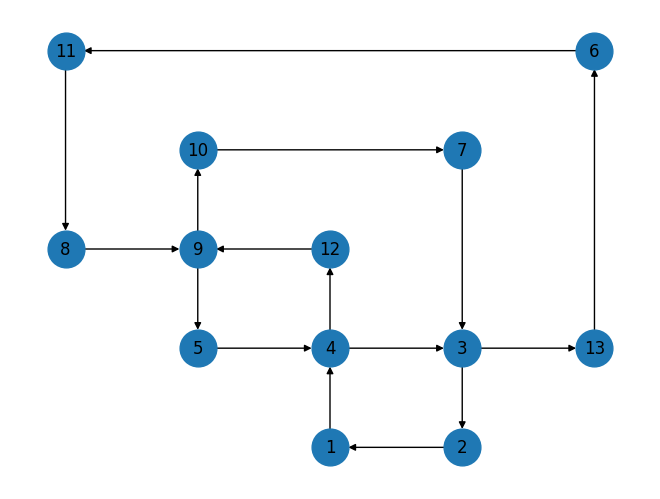

In [83]:
if cycle:
    # Create oriented graph with the cycle
    oriented_graph = nx.DiGraph()
    oriented_graph.add_nodes_from(graph.nodes)
    oriented_graph.add_edges_from([(cycle[i], cycle[i+1]) for i in range(len(cycle)-1)])

    nx.draw(oriented_graph, position, with_labels=True, node_size=700)